In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('placement.csv')
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

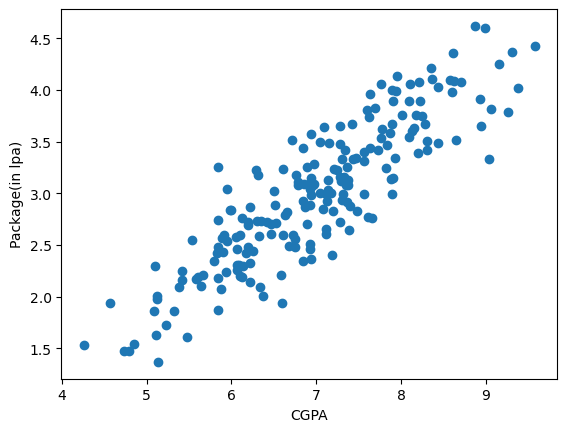

In [2]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [3]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

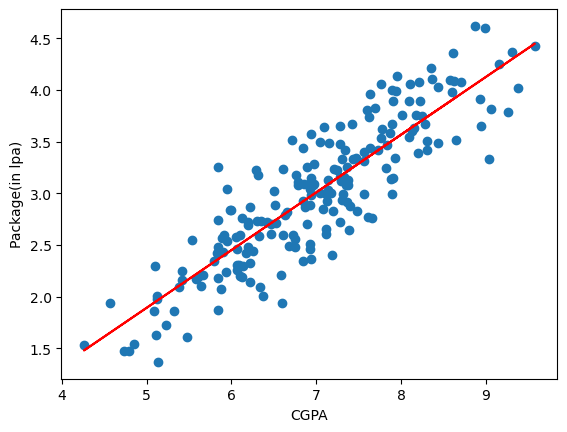

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')


In [6]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = lr.predict(X_test)
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [7]:
print("MAE",mean_absolute_error(y_test,y_pred))


MAE 0.2884710931878175


In [8]:
print("MSE",mean_squared_error(y_test,y_pred))


MSE 0.12129235313495527


In [9]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE 0.34827051717731616


In [10]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)


MSE 0.780730147510384


In [11]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [12]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [13]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.047724,3.26
1,5.12,0.549776,1.98
2,7.82,0.595129,3.25
3,7.42,0.361640,3.67
4,6.94,0.689214,3.57


Text(0, 0.5, 'Package(in lpa)')

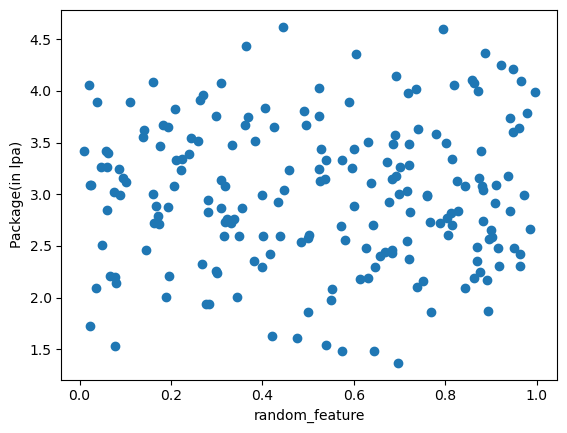

In [14]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [15]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7817879350680674


In [17]:
1 - ((1-r2)*(40-1)/(40-1-2))


0.76999268831499

In [18]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]
new_df2.sample(5)

,cgpa,iq,package
20,7.28,2.46,3.16
103,7.05,2.20,3.00
121,6.50,1.82,3.02
195,6.93,1.36,2.46
17,5.38,2.39,2.09


In [19]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]
new_df2.sample(5)

,cgpa,iq,package
49,8.87,4.62,4.62
164,9.06,4.22,3.82
80,7.63,2.24,3.44
160,7.13,2.83,2.93
15,7.25,2.73,3.23


In [20]:
np.random.randint(-100,100)


-94

In [21]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8287107350215284


In [22]:
1 - ((1-r2)*(40-1)/(40-1-2))


0.8194518558335029